#**Moneyball **


Moneyball is a very helpfull to people those who getting started with projects.


google search about money ball, theare is a lots of information about it, so i am not going to type them all


hear,at top of each cell you can find some info about why that specific cell is made.

come let's get strted.


> importing essential library and getting dataset to current working directory




hear,data set is imported from kaggle dataset and data set name is moneyball.csv file. 

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import model_selection
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

['baseball.csv']


>> getting data set and understanding them using amazing pandas library and to understand dataset i used head()function

In [68]:
dataset = pd.read_csv(r"../input/baseball.csv")
dataset.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


> Taking care of missing data, some values may contain null values eg NaN we have to change that value with some other value like mean to clean our data,

> some fetues are not affecting dependent variables, we have to remove them to make data more precise. so execution time will be reduced and from that we are avoiding fitting the useless data to the classifiers to make predictions.


> * hear, i filled with 0 and 1  inplace of NaN and Al values

In [69]:

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer = imputer.fit(dataset[['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']])
dataset[['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']] = imputer.transform(dataset[['RankSeason', 'RankPlayoffs', 'OOBP', 'OSLG']])
# replacing League with int
dataset.League.replace(['NL', 'AL'], [1, 0], inplace=True)

> dividing the complete data set as independent varialbe(X) and dependent(y) variable.

In [70]:
dataset = dataset[dataset.columns.difference(['RankPlayoffs', 'Team'])]
y = dataset.iloc[:, 9].values
y = np.ravel(y)
X = dataset[dataset.columns.difference(['Playoffs'])]

> splitting  the data set as test_set and train_set to make predictions usoing the calssfiers.

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


feature scalling used to scale the observations in an particual scale, in some cases values differ in very high range to convert them in  some specific range we use feature scalling

In [72]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
warnings.filterwarnings(action='once')

hear results are comapred with number of classifiers to choose which one makes the better prdictions

> # comparing accuracy with multiple clasifiers to compare with other cllasifiers and get more accuracy

> # Test options and evaluation metric

In [73]:
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

>  evaluate each model in turn

In [74]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(estimator = model, X = X_train, y = y_train, cv =kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.898505 (0.021130)
LDA: 0.998980 (0.003061)
KNN: 0.886364 (0.035229)
CART: 0.998980 (0.003061)
NB: 0.998980 (0.003061)
SVM: 0.925953 (0.025944)


> #fitting to selected algorithm with max performance

****note:hear we got 0.99% in 3 algorithms Lda,CART and NB but in real life getting 99% is not that much easy and many reserchers are working to improve accuracy of models

so i am going with SVM kernel but in real life we have to select the model which makes very good predictions eg:NB

In [75]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

we can't plot a graph, but using dimension reduction(PCA)technique we can see the graph in 2D 

In [76]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

> hear i used gasian distribution cllssifier which gives good predictions that is found in above.

> #fitting to selected algorithm with max performance

In [77]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

> Predicting the Test set results

In [78]:
y_pred = classifier.predict(X_test)

>  Making the Confusion Matrix


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[189,   1,   0,   0,   0,   0,   0,   0],
       [  7,   1,   0,   1,   0,   0,   0,   0],
       [ 10,   2,   0,   0,   0,   0,   0,   0],
       [ 11,   2,   0,   0,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   1,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0]])

>  Visualising the Training set results using PCA

PCA (principal  component analysis) is a dimension reduction techinque to visualize more than 2D graphs
> applying PCA on test_set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

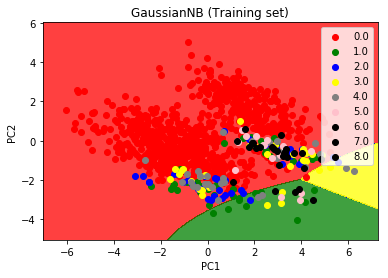

In [80]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','yellow','gray','pink','black'))(i), label = j)
plt.title('GaussianNB (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


> applying PCA on test_set or validation_set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

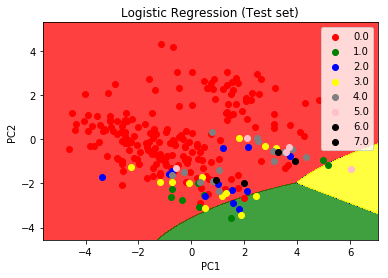

In [81]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','yellow','gray','pink','black'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()